In [1]:
import pandas as pd

In [2]:
df_acciones = pd.read_csv('AMZN-2.csv')

In [3]:
print(df_acciones.head())

         Date        Open        High        Low       Close   Adj Close  \
0  2022-11-11   97.879997  101.190002  96.660004  100.790001  100.790001   
1  2022-11-14   98.769997  100.120003  97.290001   98.489998   98.489998   
2  2022-11-15  103.209999  103.790001  97.339996   98.940002   98.940002   
3  2022-11-16   96.849998   98.489998  95.540001   97.120003   97.120003   
4  2022-11-17   95.370003   96.970001  94.029999   94.849998   94.849998   

      Volume  
0  111590500  
1   99533100  
2  111336300  
3   87958800  
4   82617900  


In [4]:
# Obtener información sobre el conjunto de datos
print(df_acciones.info())

# Estadísticas descriptivas del conjunto de datos
print(df_acciones.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   113.652152  115.172072  112.132231  113.719482  113.719482   
std     18.221020   18.258254   18.192171   18.210605   18.210605   
min     82.800003   83.480003   81.430000   81.820000   81.820000   
25%     97.404999   98.405002   95.674999   97.244999   97.244999   
50%    111.150002  114.000000  110.489998  112.910004 

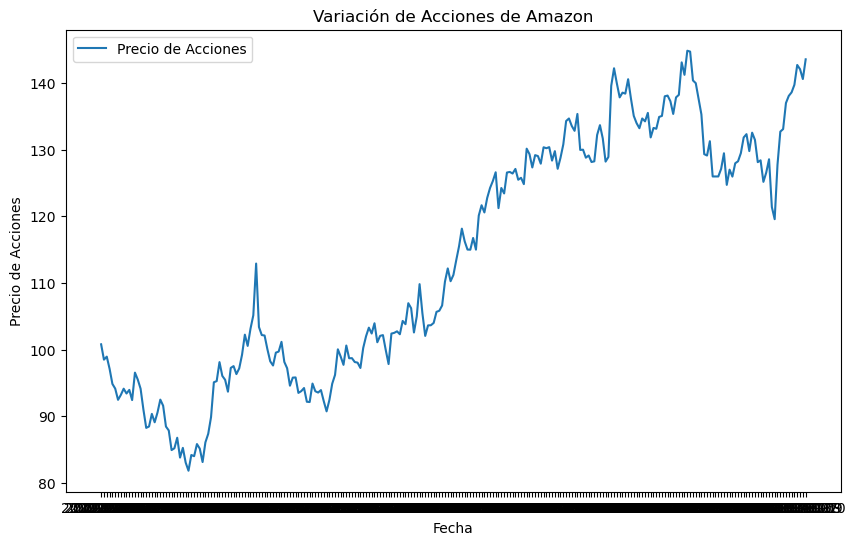

In [8]:
import matplotlib.pyplot as plt

# Visualizar la variación de las acciones a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_acciones['Date'], df_acciones['Close'], label='Precio de Acciones')
plt.title('Variación de Acciones de Amazon')
plt.xlabel('Fecha')
plt.ylabel('Precio de Acciones')
plt.legend()
plt.show()


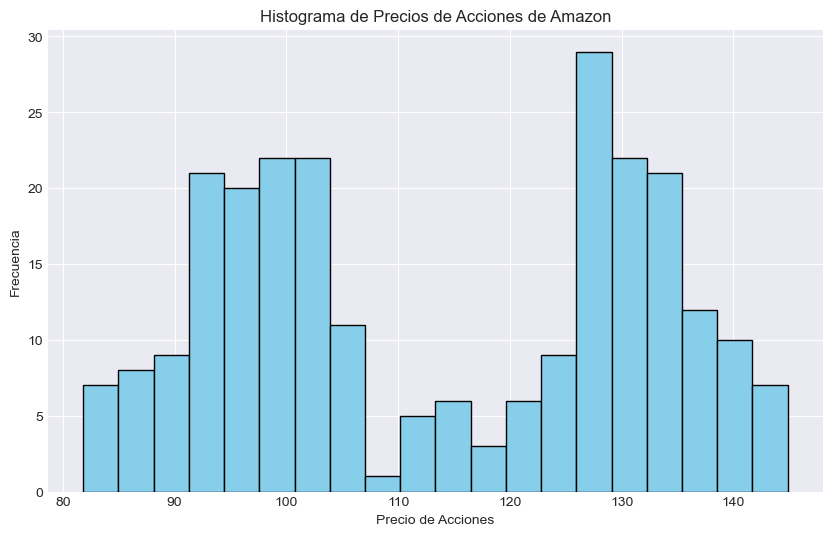

In [12]:
#Histograma de precios 
plt.figure(figsize=(10, 6))
plt.hist(df_acciones['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios de Acciones de Amazon')
plt.xlabel('Precio de Acciones')
plt.ylabel('Frecuencia')
plt.show()


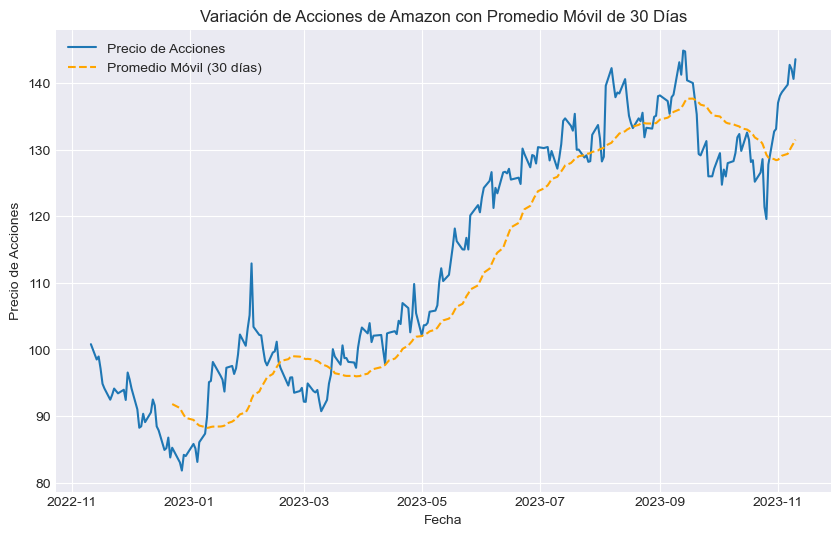

In [13]:
#Promedio Móvil 
df_acciones['Promedio_Movil_30'] = df_acciones['Close'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_acciones['Date'], df_acciones['Close'], label='Precio de Acciones')
plt.plot(df_acciones['Date'], df_acciones['Promedio_Movil_30'], label='Promedio Móvil (30 días)', linestyle='--', color='orange')
plt.title('Variación de Acciones de Amazon con Promedio Móvil de 30 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Acciones')
plt.legend()
plt.show()


In [15]:
#Volatilidad Histórica
import numpy as np
df_acciones['Log_Retorno'] = np.log(df_acciones['Close'] / df_acciones['Close'].shift(1))
volatilidad = df_acciones['Log_Retorno'].std() * np.sqrt(252)  # Se asume 252 días hábiles en un año

print(f"Volatilidad Histórica Anual: {volatilidad:.4f}")


Volatilidad Histórica Anual: 0.3447


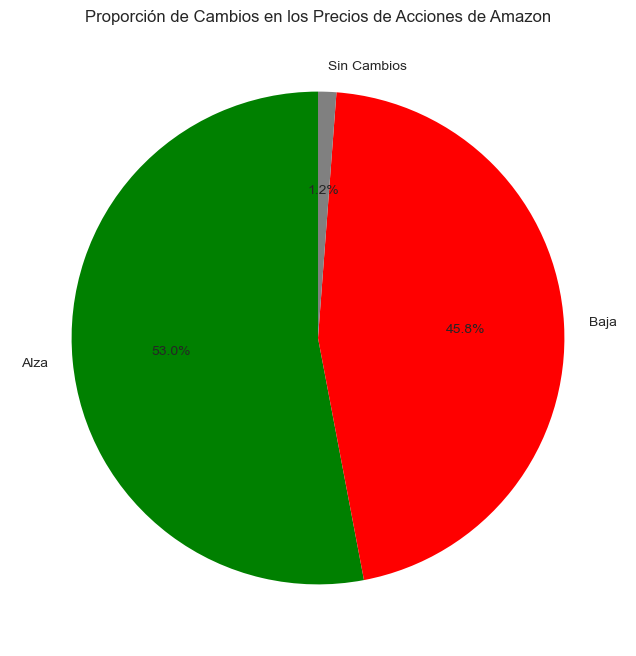

In [18]:
# Crear una nueva columna 'Cambio' que indica si el precio cerró al alza, a la baja o sin cambios
df_acciones['Cambio'] = np.where(df_acciones['Close'] > df_acciones['Close'].shift(1), 'Alza',
                                 np.where(df_acciones['Close'] < df_acciones['Close'].shift(1), 'Baja', 'Sin Cambios'))

# Contar la frecuencia de cada tipo de cambio
conteo_cambios = df_acciones['Cambio'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteo_cambios, labels=conteo_cambios.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
plt.title('Proporción de Cambios en los Precios de Acciones de Amazon')
plt.show()
